In [5]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import os
import os.path
from os.path import join
import numpy as np
import imodelsx
from tqdm import tqdm
from collections import defaultdict
import matplotlib.pyplot as plt
import json
import seaborn as sns
import data
import joblib
from matplotlib.gridspec import GridSpec
files_dict = data.load_files_dict_single_site()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/chansingh/imodelsx/.venv/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/home/chansingh/imodelsx/.venv/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


success: 18
fail: ['Cincinnati', 'Columbus']


/home/chansingh/imodelsx/.venv/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


### Filter data for single-site analysis

In [6]:
site = 'Atlanta'
# site = 'Columbus'
# site = 'WashingtonDC'
df = files_dict[site]
qs, responses_df, themes_df = data.split_single_site_df(df)

### Run sentiment
Note: this uses a lot of API calls (num questions * num responses), maybe around 400

In [7]:
sentiment_prompt = '''### You are given a question and a response. Rate the sentiment/supportiveness of the response on a scale of 1 to 5, where 1 is very negative and 5 is very positive. ###

Question: {question}

Response: {response}

Rating (1-5):'''

llm = imodelsx.llm.get_llm('gpt-4', repeat_delay=None)

num_questions = len(qs)
sentiments = defaultdict(list)
for question_num in tqdm(range(num_questions), position=0):
    question, responses, theme_dict = data.get_data_for_question_single_site(
        question_num=question_num, qs=qs, responses_df=responses_df, themes_df=themes_df)

    for response_num in tqdm(range(len(responses)), position=1):
        response = responses.values[response_num]

        if pd.isna(response):
            sentiments[question_num].append(np.nan)
        else:
            prompt = sentiment_prompt.format(
                question=question, response=response)
            ans = llm(prompt)
            sentiments[question_num].append(ans)

100%|██████████| 11/11 [00:00<00:00, 5580.91it/s]


cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!


100%|██████████| 11/11 [00:00<00:00, 5732.77it/s]


cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!


100%|██████████| 11/11 [00:00<00:00, 5983.32it/s]


cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!


100%|██████████| 11/11 [00:00<00:00, 6136.92it/s]


cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!


100%|██████████| 11/11 [00:00<00:00, 7296.75it/s]


cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!


100%|██████████| 11/11 [00:00<00:00, 6187.95it/s]


cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!


100%|██████████| 11/11 [00:00<00:00, 6363.77it/s]


cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!


100%|██████████| 11/11 [00:00<00:00, 6325.38it/s]


cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!


100%|██████████| 11/11 [00:00<00:00, 7589.63it/s]


cached!
cached!
cached!
cached!
cached!
cached!
cached!


100%|██████████| 11/11 [00:00<00:00, 7568.46it/s]


cached!
cached!
cached!
cached!
cached!
cached!
cached!


100%|██████████| 11/11 [00:00<00:00, 7003.24it/s]


cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!


100%|██████████| 11/11 [00:00<00:00, 6996.87it/s]


cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!


100%|██████████| 11/11 [00:00<00:00, 6263.55it/s]


cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!


100%|██████████| 11/11 [00:00<00:00, 13273.11it/s]


cached!


100%|██████████| 11/11 [00:00<00:00, 7140.90it/s]


cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!


100%|██████████| 11/11 [00:00<00:00, 9452.44it/s]


cached!
cached!
cached!
cached!


100%|██████████| 11/11 [00:00<00:00, 14490.37it/s]


cached!
cached!
cached!
cached!
cached!


100%|██████████| 11/11 [00:00<00:00, 7410.43it/s]


cached!
cached!
cached!
cached!
cached!
cached!
cached!


100%|██████████| 11/11 [00:00<00:00, 6323.65it/s]


cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!


100%|██████████| 11/11 [00:00<00:00, 7132.07it/s]


cached!
cached!
cached!
cached!
cached!


100%|██████████| 11/11 [00:00<00:00, 5425.37it/s]


cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!


100%|██████████| 11/11 [00:00<00:00, 6249.13it/s]


cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!


100%|██████████| 11/11 [00:00<00:00, 6319.32it/s]


cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!


100%|██████████| 11/11 [00:00<00:00, 6377.85it/s]


cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!


 54%|█████▍    | 25/46 [00:00<00:00, 247.39it/s]

cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!


100%|██████████| 11/11 [00:00<00:00, 6890.28it/s]


cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!


100%|██████████| 11/11 [00:00<00:00, 6337.55it/s]


cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!


100%|██████████| 11/11 [00:00<00:00, 6253.37it/s]


cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!


100%|██████████| 11/11 [00:00<00:00, 6198.76it/s]


cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!


100%|██████████| 11/11 [00:00<00:00, 6077.10it/s]


cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!


100%|██████████| 11/11 [00:00<00:00, 6556.39it/s]


cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!


100%|██████████| 11/11 [00:00<00:00, 12643.83it/s]


cached!


100%|██████████| 11/11 [00:00<00:00, 7482.54it/s]


cached!
cached!
cached!
cached!
cached!
cached!
cached!


100%|██████████| 11/11 [00:00<00:00, 6990.51it/s]


cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!


100%|██████████| 11/11 [00:00<00:00, 8659.41it/s]


cached!
cached!
cached!
cached!
cached!


100%|██████████| 11/11 [00:00<00:00, 6688.51it/s]


cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!


100%|██████████| 11/11 [00:00<00:00, 6617.52it/s]


cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!


100%|██████████| 11/11 [00:00<00:00, 9964.87it/s]


cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!


100%|██████████| 11/11 [00:00<00:00, 7038.50it/s]


cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!


100%|██████████| 11/11 [00:00<00:00, 6576.96it/s]


cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!


100%|██████████| 11/11 [00:00<00:00, 6587.28it/s]


cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!


100%|██████████| 11/11 [00:00<00:00, 6546.16it/s]


cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!


100%|██████████| 11/11 [00:00<00:00, 6538.74it/s]


cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!


100%|██████████| 11/11 [00:00<00:00, 9795.61it/s]


cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!
cached!


100%|██████████| 11/11 [00:00<00:00, 8523.43it/s]


cached!
cached!
cached!
cached!
cached!
cached!


100%|██████████| 46/46 [00:00<00:00, 250.79it/s]

cached!
cached!
cached!
cached!
cached!
cached!
cached!


### Plot sentiment

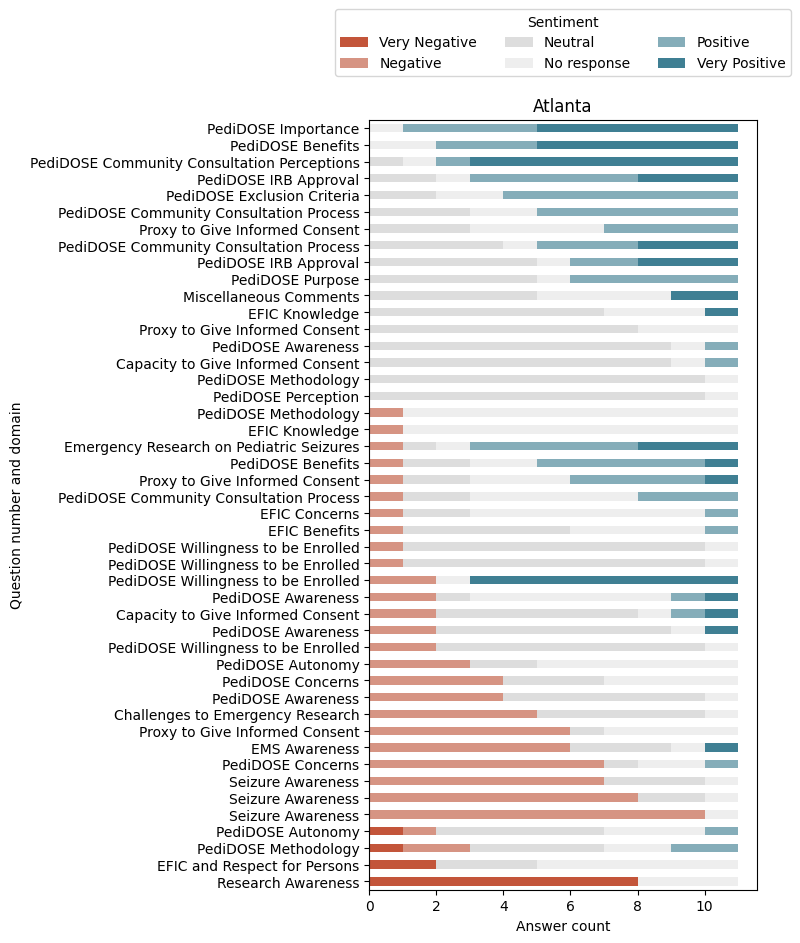

In [8]:
sent_df = pd.DataFrame([(key, var) for (key, L) in sentiments.items() for var in L],
                       columns=['Question', 'Value'])

# round  values
sent_df['Value'] = sent_df['Value'].astype(float).round()
value_maps = {
    1: 'Very Negative',
    2: 'Negative',
    3: 'Neutral',
    4: 'Positive',
    5: 'Very Positive',
}
sent_df['Value'] = sent_df['Value'].map(value_maps.get)
sent_df['Value'] = sent_df['Value'].fillna('No response')

sent_df = sent_df.groupby(['Question', 'Value']).size().unstack(fill_value=0)
levels = ['Very Negative', 'Negative', 'Neutral',
          'No response', 'Positive', 'Very Positive']
sent_df = sent_df.reindex(levels, axis=1)
joblib.dump(sent_df, join(data.PROCESSED_DIR, f'sent_df_{site}.pkl'))

# make plot
sent_df = sent_df.sort_values(by=levels, ascending=False)
colors = sns.diverging_palette(20, 220, n=6).as_hex()
colors = colors[:2] + ['#ddd', '#eee'] + colors[-2:]
sent_df.plot(kind='barh', stacked=True, figsize=(5, 10), color=colors)

plt.yticks(range(46), labels=df['Domain'].values[sent_df.index.values])
plt.legend(bbox_to_anchor=(0.5, 1.1), loc='center', ncol=3, title='Sentiment')
plt.xlabel('Answer count')
plt.ylabel('Question number and domain')
plt.title(site)
plt.savefig(f'../figs/eda/sentiment_example_{site}.pdf', bbox_inches='tight')
plt.show()

### Aggregate sentiment plots

In [9]:
sent_dfs = []
sites = ['Atlanta', 'Columbus', 'WashingtonDC']
for site in sites:
    sent_df = joblib.load(join(data.PROCESSED_DIR, f'sent_df_{site}.pkl'))
    # sent_df = sent_df.sort_values(by=levels, ascending=False)
    sent_dfs.append(sent_df)

sum_df = pd.concat(sent_dfs).groupby(level=0).sum()

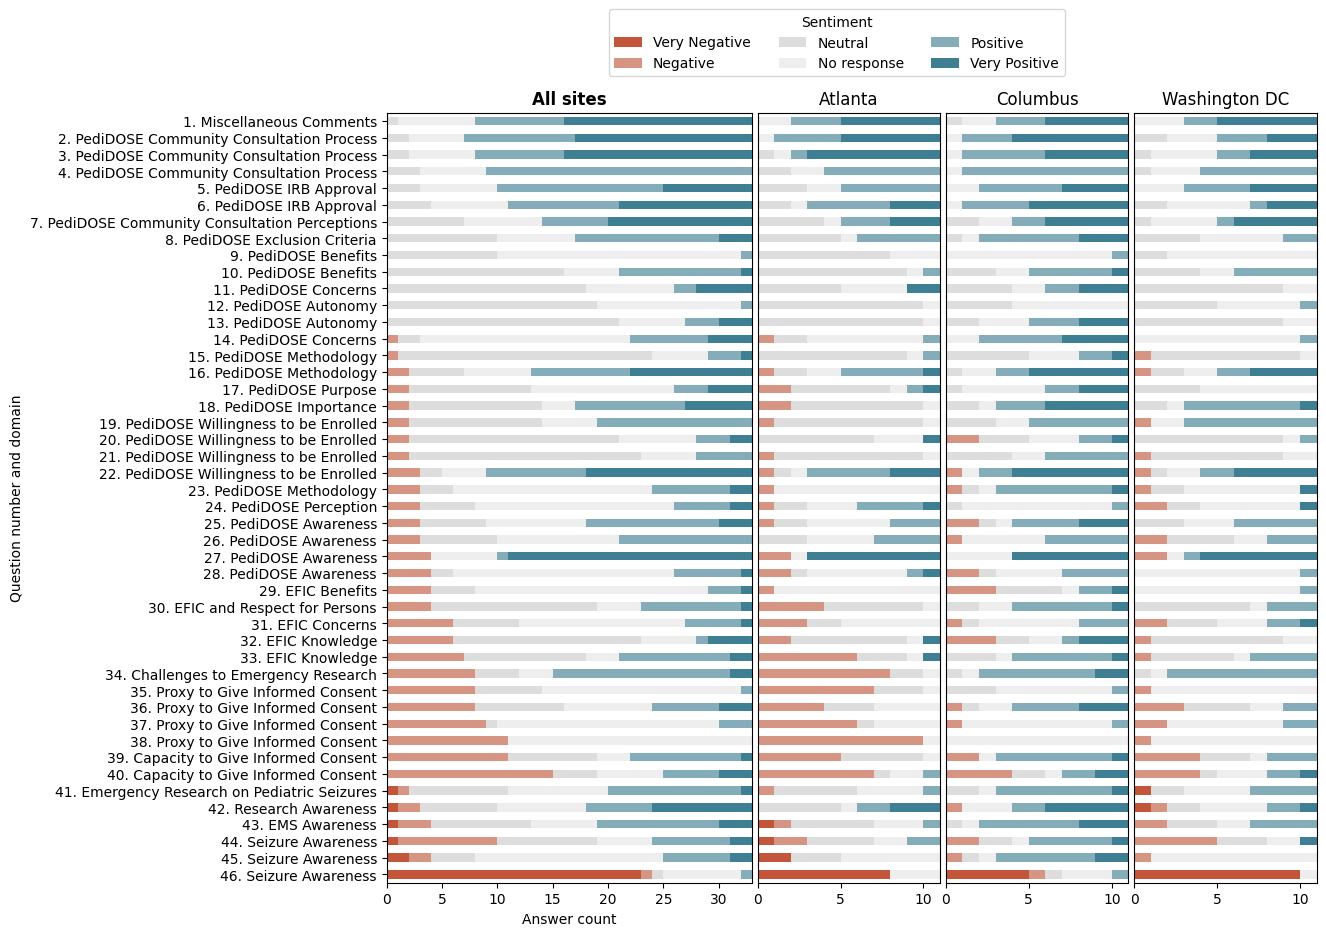

In [10]:
# make plot
sum_df = sum_df.sort_values(by=levels, ascending=False)
sum_index_sorted = sum_df.index
colors = sns.diverging_palette(20, 220, n=6).as_hex()
colors = colors[:2] + ['#ddd', '#eee'] + colors[-2:]

fig = plt.figure(figsize=(12, 10))
gs = GridSpec(1, 4, width_ratios=[2, 1, 1, 1], wspace=0.025)


# first plot
ax1 = fig.add_subplot(gs[0])
sum_df.plot(kind='barh', stacked=True, color=colors, ax=ax1, legend=False)
plt.xlim(0, sum_df.sum(axis=1).max())
plt.yticks(range(46),
           labels=[f'{len(sent_df) - i}. {v}' for i, v in enumerate(
               df['Domain'].values[sent_df.index.values])])
fig.legend(bbox_to_anchor=(0.5, 0.95), loc='center', ncol=3, title='Sentiment')
plt.xlabel('Answer count')
plt.title('All sites', fontweight='bold')
plt.ylabel('Question number and domain')

for i, site in enumerate(sites):
    ax = fig.add_subplot(gs[i+1])
    sent_df = sent_dfs[i]
    sent_df = sent_df.reindex(sum_index_sorted)
    sent_df.plot(kind='barh', stacked=True, color=colors, ax=ax, legend=False)
    plt.xlim(0, sent_df.sum(axis=1).max())
    plt.yticks([])
    plt.ylabel('')
    plt.title(data.RENAME_SITE_DICT.get(site, site))
plt.savefig(f'../figs/sentiment_agg.pdf', bbox_inches='tight')
plt.savefig(f'../figs/sentiment_agg.png', bbox_inches='tight', dpi=300)
plt.show()

In [11]:
# no limit display
with pd.option_context('display.max_rows', None, 'display.max_colwidth', None):
    d = df.iloc[sum_index_sorted][::-1][['Domain', 'Subcategory']]
    d['Question order'] = d.index
    d.insert(loc=0, column='Question number', value=np.arange(1, len(d) + 1))
    # display(d)
    d.to_csv('../figs/question_list.csv', index=False)

In [12]:
sum_index_sorted

Index([ 4, 16, 30, 33, 40, 17, 35, 12,  2,  9, 32,  1,  0,  3, 21, 34, 20, 13,
       19, 27,  8, 44, 11, 31,  5, 26, 14, 25, 24,  7, 36, 18, 15, 22, 23, 45,
        6, 10, 29, 42, 41, 43, 38, 39, 28, 37],
      dtype='int64', name='Question')

# Human annotation

**Select questions**

In [15]:
# # original function filter 10 questions that have many themes (these tend to be more interesting)
# # select questions
# def get_num_themes(df):
#     num_themes_list = []
#     for question_num in range(len(df)):
#         question, responses, theme_dict = data.get_data_for_question_single_site(
#             question_num=question_num, qs=qs, responses_df=responses_df, themes_df=themes_df)
#         num_themes_list.append(len(theme_dict))
#     return np.array(num_themes_list)
#     # df['num_themes'] = num_themes_list
#     # return df


# num_themes = np.zeros(46)
# SITES = ['Atlanta', 'Columbus', 'WashingtonDC']
# for site in sites:
#     df = files_dict[site]
#     num_themes += get_num_themes(df)
# idx = pd.Series(num_themes).sort_values(ascending=False)
# questions_selected = idx.index[:10]

# instead pick 3 most positive, 3 middle, and 3 most negative
mid = 46 // 2
sorted_qs = list(sum_index_sorted)
questions_selected = sorted_qs[:3] + sorted_qs[mid-1:mid+2] + sorted_qs[-3:]

# save these questions
pd.Series(questions_selected).to_csv(
    '../figs/human/sentiment_questions_selected.csv', index=False, header=False)

**Select random answers to questions (up to 15 per question)**

In [19]:
# read in responses from all sites
resps_dict = defaultdict(list)
for question_num in questions_selected:
    for site in sites:
        df = files_dict[site]
        question, responses, theme_dict = data.get_data_for_question_single_site(
            question_num=question_num, qs=qs, responses_df=responses_df, themes_df=themes_df)
        resps_dict[question_num] += list(responses)
assert np.all(np.array(list(len(v) for v in resps_dict.values())) == 33)


# randomly select up to 15 non-nan responses for each question and record their indices (less if there are fewer than 15)
rng = np.random.default_rng(13)
resps_idx_selected = defaultdict(list)
resps_selected = {}
for question_num in questions_selected:
    resps = resps_dict[question_num]
    indices = np.arange(33)[~pd.isna(resps)]
    indices_selected = rng.choice(
        indices, size=min(len(indices), 15), replace=False).tolist()
    resps_idx_selected[question_num] = indices_selected
    resps_selected[question_num] = [resps[i] for i in indices_selected]

# put into a big defaultdict
dd = defaultdict(list)
for question_num in questions_selected:
    for i, resp in enumerate(resps_selected[question_num]):
        dd['Question number'].append(question_num)
        dd['Response number'].append(resps_idx_selected[question_num][i])

        dd['Question'].append(qs[question_num])
        dd['Response'].append(resp)

# dump
with open('../figs/human/sentiment_idx_selected.json', 'w') as f:
    json.dump(resps_idx_selected, f, indent=4)
ddf = pd.DataFrame.from_dict(dd)
ddf.to_csv('../figs/human/sentiment_template.csv', index=False)
ddf.to_pickle('../figs/human/sentiment_template.pkl')

### Analyze results

In [20]:
template = pd.read_pickle('../figs/human/sentiment_template.pkl')

In [22]:
hum1 = pd.read_csv('../figs/human/collected/sentiment_human1.csv', skiprows=1)

In [24]:
def remove_all_whitespace(s):
    return ''.join(s.split())


# check for matching index
assert np.all(hum1['Response number'].astype(str).apply(remove_all_whitespace).values ==
              template['Response number'].astype(str).apply(remove_all_whitespace).values)

In [26]:
template['hum1'] = hum1['Rating'].values.astype(int)
# check that values are in range 1-5
assert np.all(template['hum1'].values >= 1)
assert np.all(template['hum1'].values <= 5)